In [ ]:

import pandas as pd
import numpy as np
from urllib.parse import urlparse
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [ ]:

df = pd.read_csv("../Data/cleaned_urls.csv")
print("Cleaned dataset shape:", df.shape)
print(df.head())


Cleaned dataset shape: (1090518, 3)
                         url  label  url_length
0     https://www.google.com      0          22
1    https://www.youtube.com      0          23
2   https://www.facebook.com      0          24
3      https://www.baidu.com      0          21
4  https://www.wikipedia.org      0          25


In [ ]:

suspicious_words = [
    "login", "signin", "bank", "secure", "update", "confirm", "account", "verify",
    "wp-admin", "admin", "password", "ebay", "paypal", "free", "urgent"
]

def extract_features(url):
    try:
        parsed = urlparse(url)
        domain = parsed.netloc

        features = {
            "url_length": len(url),
            "domain_length": len(domain),
            "path_length": len(parsed.path),
            "num_dots": url.count("."),
            "num_hyphens": url.count("-"),
            "num_at": url.count("@"),
            "num_question": url.count("?"),
            "num_percent": url.count("%"),
            "num_equal": url.count("="),
            "num_slash": url.count("/"),
            "num_digits": sum(c.isdigit() for c in url),
            "has_ip": 1 if re.match(r"\d+\.\d+\.\d+\.\d+", domain) else 0,
            "tld_len": len(domain.split(".")[-1]) if "." in domain else 0,
            "suspicious_words": sum(word in url.lower() for word in suspicious_words)
        }
        return features
    except Exception as e:
        print("Error in URL:", url)
        return None


In [ ]:


print("Extracting features from URLs ... This may take a while for large datasets!")

feature_list = []
for u in df["url"]:
    feat = extract_features(u)
    if feat:
        feature_list.append(feat)

X = pd.DataFrame(feature_list)
y = df["label"]

print("Features shape:", X.shape)
print(X.head())


Extracting features from URLs ... This may take a while for large datasets!
Error in URL: http://ladiesfirst-privileges[.]com/656465/d5678h9.exe
Features shape: (1090517, 14)
   url_length  domain_length  path_length  num_dots  num_hyphens  num_at  \
0          22             14            0         2            0       0   
1          23             15            0         2            0       0   
2          24             16            0         2            0       0   
3          21             13            0         2            0       0   
4          25             17            0         2            0       0   

   num_question  num_percent  num_equal  num_slash  num_digits  has_ip  \
0             0            0          0          2           0       0   
1             0            0          0          2           0       0   
2             0            0          0          2           0       0   
3             0            0          0          2           0       0  

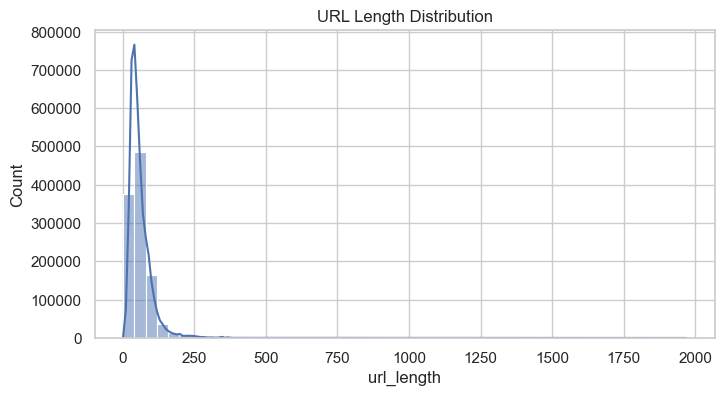

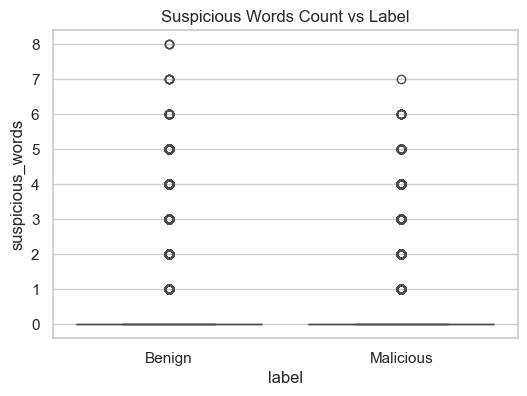

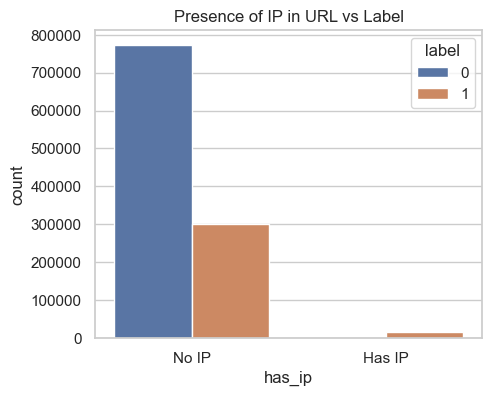

In [ ]:

plt.figure(figsize=(8,4))
sns.histplot(X["url_length"], bins=50, kde=True)
plt.title("URL Length Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=X["suspicious_words"])
plt.title("Suspicious Words Count vs Label")
plt.xticks([0,1], ["Benign", "Malicious"])
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x=X["has_ip"], hue=y)
plt.title("Presence of IP in URL vs Label")
plt.xticks([0,1], ["No IP", "Has IP"])
plt.show()


In [ ]:

pickle.dump(X, open("../saved_models/X.pkl", "wb"))
pickle.dump(y, open("../saved_models/y.pkl", "wb"))

print("Saved feature matrix X and labels y in saved_models/")


Saved feature matrix X and labels y in saved_models/
